---
title: "Drake Over the Years"
description: "Final Project for DH140" author: "Harvey Zhao"
date: "08/01/2024" date-modified: "08/01/2024"
---

# Dividing Drake's Career into Eras

## Introduction
---
an overview of your entire project, your research topic and question, your motivation to study this topic, and any prior related work

Drake has been on the news lately for shameful reasons. His career has taken a hit from his allegedly impure relationship with minors. This was hard to bear, since I am a big fan of Drake's smooth chorus and catchy lyrics. Although his future looks uncertain, Drake has had his ups and downs since he began rapping. I want to dive deep into over 200 of his songs **between 2007 and 2018**, analyze their **emotion, recurring theme and linguistic complexity** to roughly sort his career into eras. My research question is: *How have the emotion, recurring themes, and linguistic complexity in Drake's lyrics evolved between 2007 and 2018, and can these changes be used to delineate distinct eras in his musical career?* 

<div>
  <img src="https://coronadoexplorer.com/wp-content/uploads/2023/08/Drake-e1693935526783.png" height="200px"></img>
</div>

OG Drake fans reached a concensus on Drake's eras. 
### Sentimental youngin: 2007-2010
In his early career, from 2007 to 2010, his work particularly with the release of <i>So Far Gone</i> in 2009, was characterized by vulnerability and introspection, laying the groundwork for his distinctive fusion of rap and R&B.

### Lady's man: 2010-2012
With the release of *Thank Me Later* in 2010 and *Take Care* in 2011, Drake refined his production added in a rich tapestry of Jamaican musical style. He became the street-smart Canadian kid that understands women.

### Pop-Icon: 2013-2015
During the era from 2013 to 2015, Drake finally came on top with hits like *Hold On, We’re Going Home* and *Hotline Bling*. He was more hesitant to release new albums and was more lyrical. Drake's fans think this era was his golden age - when he was positive and didn't flash money or use women as his music appeal. Drake's lyrics during this time often focused on the themes of fame, success, and the challenges that accompany them. He explored the highs and lows of his celebrity status, showcasing a more polished and refined musical style. Critics noted how he combined catchy hooks with introspective verses, allowing listeners to connect with his experiences while also enjoying the infectious rhythms.

Let's find out whether Drake changed over the years through his lyrics :)

## Methods
---
Explain Your Data and your analytical process

include 4 data visualizations

Dataset: Drake lyrics until 2018.
Summary info about data: 500+ Drake's songs, each song has a name, album, year released and lyrics.
Summary statistics: 
Indentification of where there may be missing/incorrect/outlier data:
Despite having such easy-to-use API assisting the scraping process, cleaning the data was no easy task. Out of over 500 songs on Genius, there were around 300 tracks that are either duplicates, Live version, diss tracks, or the like, and they were all filtered from the dataset. The lyrics were not clean data either, as there were a lot of noise, redundant characters, and typos.
Data processing:

In [ ]:
# scraping data
from lyricsgenius import Genius

TOKEN = "Y6yG_E9GniF_DrQmqk1Lq7DyFyrQhLeCQRcklGHzY7KcHI0-ZLIJzaDQ6nrufV8i"
genius = Genius(TOKEN)
genius.excluded_terms = ["Remix", "Live", "Untitled", "u00e7e ", "Separate LivesVer", "Mashup", "Freestyle", "Leak",
                      "Diss", "Award", "Verse", "Dub", "Demo", "Awards", "Length", "Zin", "#", "version", None]
artist = genius.search_artist("Drake", max_songs=1)
lyrics = artist.save_lyrics()

In [24]:
# create file paths + dataframe
import os
import glob
import json
import pandas as pd

path = './lyrics_files'
data_list = []

# Read and process JSON files
for filename in glob.glob(os.path.join(path, '*.json')):  # Only process .JSON files in the folder
  with open(filename, encoding='utf-8', mode='r') as json_file:
    data = json.load(json_file)
    songs = data.get('songs', [])
    for song in songs:
      data_list.append({
        'name': song.get('title'),
        'album': song.get('album'),
        'year': song.get('year'),
        'lyrics': song.get('lyrics')
      })

# Create DataFrame
lyrics_df = pd.DataFrame(data_list, columns=['name', 'album', 'year', 'lyrics'])

Let's take a look at the scraped csv's first 10 rows, and see what needs to be fixed:

In [15]:
lyrics_df.head(10)

,name,album,year,lyrics
0,Good Ones Go (Interlude),Take Care,2011-11-15,"[Intro]\nOh yeah\nOh yeah, oh yeah, oh\nOh yea..."
1,Keep the Family Close,Views,2016-04-29,[Intro]\nIt's a little chilly out there\nHow y...
2,Using Me,None,None,Yeah\n6 shit\n\nBeen with so many women I can’...
3,Light Up,Thank Me Later,2010-06-15,"[Verse 1: Drake]\nUh, I've been up for four da..."
4,Catch No Feelings,None,None,"[Drake]\nI told you from the jump, me and you ..."
5,These Days,None,2016-03-29,[Verse 1]\nI've been out walking\nI don't do t...
6,Overdose On Life,None,2008-04-30,And I'm a leave on one more note\nOne more mot...
7,Talk Up,Scorpion,2018-06-29,"[Intro: Drake]\nDJ Paul\nTWhy\nAyy, ayy\nLot o..."
8,Cannonball,Heartbreak Drake,None,"[Chorus: Colin Munroe]\nHow could I fly, but l..."
9,Thank You Note to 40,None,2016-04-28,Before we do this I just wanna say thanks man....


We are getting a lot of null values in album and year. We will only keep offically released songs for analysis, so any songs without an album or a release date needs to be gone.

In [25]:
# remove all rows that have null values
lyrics_df = lyrics_df.dropna(how='any', axis=0)
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 390
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    221 non-null    object
 1   album   221 non-null    object
 2   year    221 non-null    object
 3   lyrics  221 non-null    object
dtypes: object(4)
memory usage: 8.6+ KB


In [26]:
lyrics_df.head()

,name,album,year,lyrics
0,Good Ones Go (Interlude),Take Care,2011-11-15,"[Intro]\nOh yeah\nOh yeah, oh yeah, oh\nOh yea..."
1,Keep the Family Close,Views,2016-04-29,[Intro]\nIt's a little chilly out there\nHow y...
3,Light Up,Thank Me Later,2010-06-15,"[Verse 1: Drake]\nUh, I've been up for four da..."
7,Talk Up,Scorpion,2018-06-29,"[Intro: Drake]\nDJ Paul\nTWhy\nAyy, ayy\nLot o..."
10,Juice,Born Successful,2009-12-11,[Produced by Boi-1da]\n\n[Intro]\nBoi-1da... D...


Let's make the 'year' column year only, and resort the data alphabetically regarding the album names.

In [27]:
lyrics_df['year'] = pd.to_datetime(lyrics_df['year']).dt.strftime('%Y')
lyrics_df = lyrics_df.sort_values('album')
lyrics_df.head()

,name,album,year,lyrics
155,Right to Left,Born Successful,2009,[Intro]\n[?]\n\n[Chorus: Drake]\nBlue green je...
200,Forever (Born Successful),Born Successful,2009,[Chorus: Drake]\nIt may not mean nothing to y'...
189,The Winner,Born Successful,2009,[Verse 1]\nI’m performing tonight you know tha...
181,I Do This,Born Successful,2009,"[Verse 1: Drake]\nUh, shit's all good\nThe dea..."
120,Fallen,Born Successful,2009,"[Intro: Drake]\nYeah, it's Drake, KC\n\n[Verse..."


Now we can drop the index and clean lyrics.

In [28]:
import re

def clean_lyrics(lyrics):
    if not lyrics:
        return lyrics

    # Remove apostrophes
    lyrics = lyrics.replace("'", "")

    # Remove song structure tags or instructions in brackets
    lyrics = re.sub(r'[\*\[\(\{].*?[\*\]\)\}]', ' ', lyrics)
    
    # Remove variations of Verse 1, VERSE 2, etc.
    lyrics = re.sub(r'\b[Vv]erse \d+\b', '', lyrics)
    
    # Remove specific structure markers formatted as all caps without brackets
    structure_words = ['OUTRO', 'INSTRUMENTAL', 'PRE', 'HOOK', 'PRODUCED', 'REFRAIN', 
                       'POST', 'REPEAT', '2x', '3x', '4x', 'CHORUS', 'INTRO', 'INTERLUDE']
    for word in structure_words:
        lyrics = lyrics.replace(word, '')
    
    # Remove variations of Chorus, Intro, Instrumental, Bridge, Hook, Repeat
    lyrics = re.sub(r'\b[Cc]horus\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Ii]ntro\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Ii]nstrumental\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Bb]ridge\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Hh]ook\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Rr]epeat\b.*', '', lyrics)

    # Remove credits
    lyrics = re.sub(r'.*[Pp]roduced [Bb]y.*', ' ', lyrics)
    lyrics = re.sub(r'.*[Ww]ritten [Bb]y.*', ' ', lyrics)
    
    # Remove strays and typos
    stray_patterns = [
        r'\[Outro\[', r'Sax & background & instrumental\)', r'\nSource: ', 
        r'Shotgun 2: 58 Trk 1 \n  \nJr. Walker & The All Stars \nAnd/or The Funk Brothers - instrumental \nPop Chart #4 Feb 13, 1965 \nSoul Label - 35008 \n ',
        r'- musical interlude -', r'\nRefrain:'
    ]
    for pattern in stray_patterns:
        lyrics = re.sub(pattern, ' ', lyrics)
    
    # Replace all punctuations with spaces
    lyrics = re.sub(r'[^\w\s]', ' ', lyrics)
    
    # Replace consecutive whitespaces with a single space
    lyrics = re.sub(r'\s+', ' ', lyrics).strip()
    
    # Convert all tokens to lowercase
    lyrics = lyrics.lower()

    return lyrics

In [29]:
lyrics_df['lyrics'] = lyrics_df['lyrics'].map(clean_lyrics)
lyrics_df.head()

,name,album,year,lyrics
155,Right to Left,Born Successful,2009,blue green jewels with the supreme fuel and lo...
200,Forever (Born Successful),Born Successful,2009,it may not mean nothing to yall but understand...
189,The Winner,Born Successful,2009,i m performing tonight you know that shit gone...
181,I Do This,Born Successful,2009,uh shits all good the deal got signed and my s...
120,Fallen,Born Successful,2009,yeah its drake kc we was just walking just smi...


We can save our preprocessed data to `lyrics.csv` now. We are done with cleaning the data!

In [30]:
lyrics_path = "./lyrics.csv"
lyrics_df.to_csv(lyrics_path, index=False)

### Summary Statistics of data
---
Since our csv file contains a list of officially songs, album, release dates and lyrics, we can get a high level view of the dataset by looking at:
1) How many songs did Drake release
2) Number of albums
3) Number of years Drake made a release
4) First and last year of songs in this table
5) Word count distribution of Drake's songs

In [31]:
import pandas as pd
df = pd.read_csv('lyrics.csv')
df.head()

,name,album,year,lyrics
0,Right to Left,Born Successful,2009,blue green jewels with the supreme fuel and lo...
1,Forever (Born Successful),Born Successful,2009,it may not mean nothing to yall but understand...
2,The Winner,Born Successful,2009,i m performing tonight you know that shit gone...
3,I Do This,Born Successful,2009,uh shits all good the deal got signed and my s...
4,Fallen,Born Successful,2009,yeah its drake kc we was just walking just smi...


#### Number of songs
Drake had 221 officially released songs in this dataset. Compared to other hip hop artists, Drake was one of the most productive. 

In [32]:
num_songs = df['name'].nunique()
print(f"Number of songs: {num_songs}")

Number of songs: 221


In [33]:
# Number of albums
num_albums = df['album'].nunique()
print(f"Number of albums: {num_albums}")

Number of albums: 22


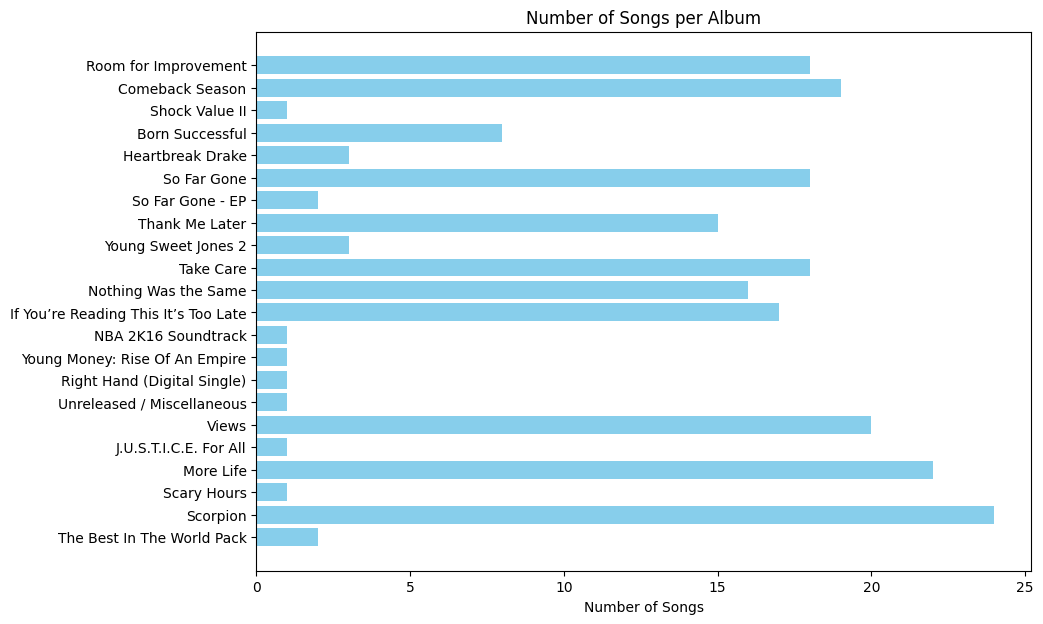

In [43]:
# Count the number of songs per album
songs_per_album = df.groupby(['year', 'album']).size().reset_index(name='count')

# Sort by year
songs_per_album = songs_per_album.sort_values('year')

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.barh(songs_per_album['album'], songs_per_album['count'], color='skyblue')
plt.xlabel('Number of Songs')
plt.title('Number of Songs per Album')
plt.gca().invert_yaxis()  # invert the y-axis to have the album with the most songs at the top
plt.show()

In [34]:
# Number of years Drake made a release
num_years = df['year'].nunique()
print(f"Number of years Drake made a release: {num_years}")

Number of years Drake made a release: 13


In [36]:
first_year = df['year'].min()
last_year = df['year'].max()
print(f"First year of songs: {first_year}")
print(f"Last year of songs: {last_year}")

First year of songs: 2006
Last year of songs: 2019


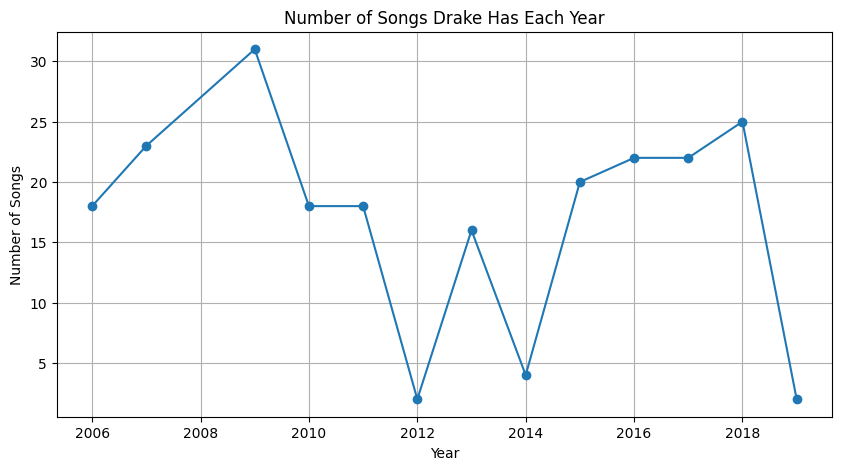

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('lyrics.csv')

# Count the number of songs each year
songs_per_year = df.groupby('year').size()

# Create a line chart
plt.figure(figsize=(10, 5))
plt.plot(songs_per_year.index, songs_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Drake Has Each Year')
plt.grid(True)
plt.show()

In [37]:
# Word count distribution of Drake's songs
df['word_count'] = df['lyrics'].apply(lambda x: len(str(x).split()))
print("\nWord count distribution:")
print(df['word_count'].describe())


Word count distribution:
count     221.000000
mean      511.294118
std       211.445564
min         9.000000
25%       362.000000
50%       519.000000
75%       639.000000
max      1122.000000
Name: word_count, dtype: float64


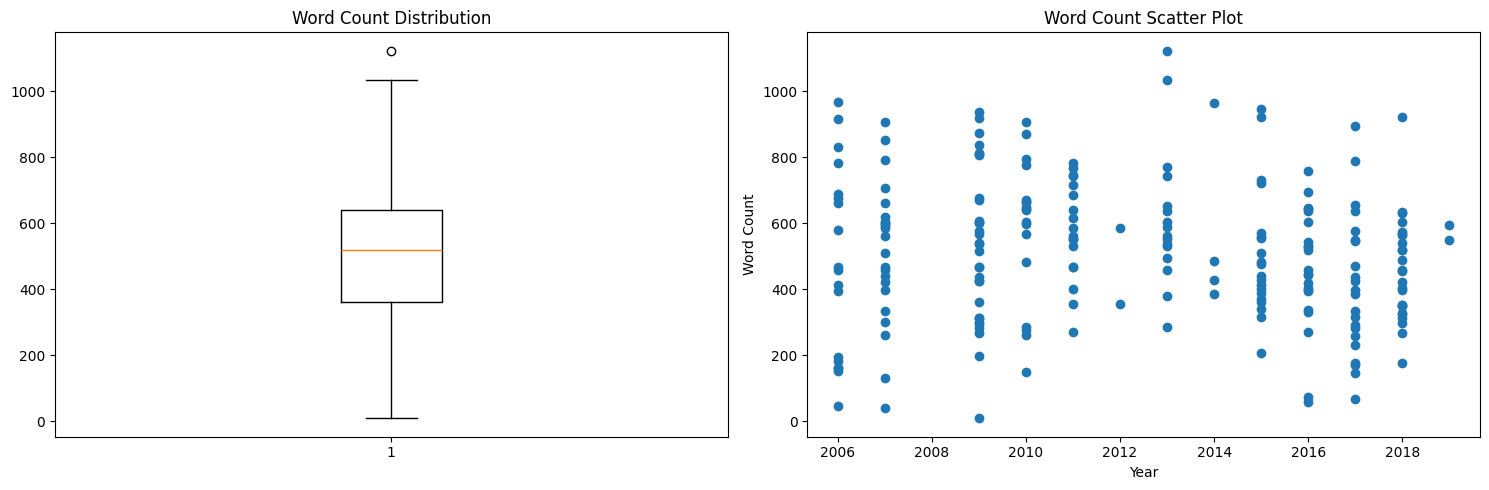

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('lyrics.csv')

# Calculate word count for each song
df['word_count'] = df['lyrics'].apply(lambda x: len(str(x).split()))

# Create a new figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a boxplot of word count distribution
axs[0].boxplot(df['word_count'])
axs[0].set_title('Word Count Distribution')

# Create a scatter plot of word count vs year
axs[1].scatter(df['year'], df['word_count'])
axs[1].set_title('Word Count Scatter Plot')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Word Count')

# Display the plots
plt.tight_layout()
plt.show()

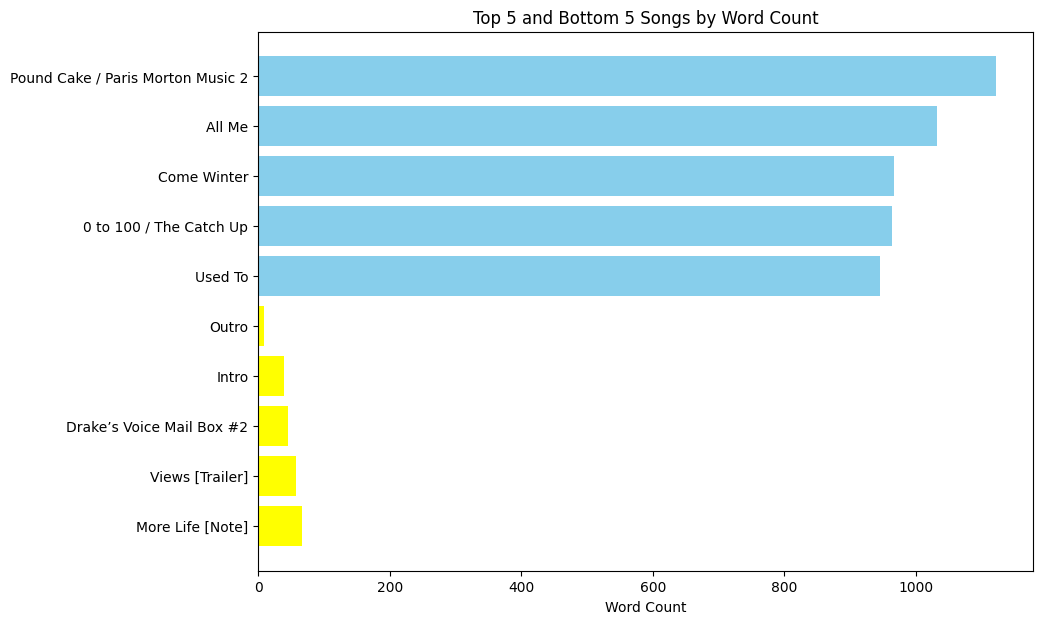

In [41]:
# Calculate word count for each song
df['word_count'] = df['lyrics'].apply(lambda x: len(str(x).split()))

# Get the top 5 songs with the most words
top_5_songs = df.nlargest(5, 'word_count')

# Get the top 5 songs with the least words
bottom_5_songs = df.nsmallest(5, 'word_count')

# Combine the two dataframes
combined_df = pd.concat([top_5_songs, bottom_5_songs])

# Create a bar chart
plt.figure(figsize=(10, 7))
bars = plt.barh(combined_df['name'], combined_df['word_count'], color=['skyblue']*5 + ['yellow']*5)
plt.xlabel('Word Count')
plt.title('Top 5 and Bottom 5 Songs by Word Count')
plt.gca().invert_yaxis()  # invert the y-axis to have the song with the most words at the top
plt.show()

## Results
---
Lay out your data exploration, your findings, and your visuals

## Discussion
---
What does your analysis show, what is the big picture, and how are these findings useful?